# Выбор локации для скважины

Допустим, мы работаем в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину. 

Шаги для выбора локации обычно такие:

- В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
- Строят модель для предсказания объёма запасов в новых скважинах;
- Выбирают скважины с самыми высокими оценками значений;
- Определяют регион с максимальной суммарной прибылью отобранных скважин.

Нам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль. 

# Планы по выполнению проекта:
1. Загрузить и подготовить данные. Пояснить порядок действий.

2. Обучить и проверить модель для каждого региона:
    1. Разбить данные на обучающую и валидационную выборки в соотношении 75:25.
    1. Обучить модель и сделать предсказания на валидационной выборке.
    1. Сохранить предсказания и правильные ответы на валидационной выборке.
    1. Напечатать на экране средний запас предсказанного сырья и RMSE модели.
    1. Проанализировать результаты.

3. Подготовить к расчёту прибыли:
    1. Все ключевые значения для расчётов сохранить в отдельных переменных.
    1. Рассчитать достаточный объём сырья для безубыточной разработки новой скважины. Сравнить полученный объём сырья со средним запасом в каждом регионе. 
    1. Написать выводы по этапу подготовки расчёта прибыли.

4. Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
    1. Выбрать скважины с максимальными значениями предсказаний. 
    1. Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям.
    1. Рассчитать прибыль для полученного объёма сырья.

5. Посчитать риски и прибыль для каждого региона:
    1. Применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    1. Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
    1. Написать выводы: предложить регион для разработки скважин и обосновать выбор.

# Описание данных

Данные геологоразведки трёх регионов находятся в файлах: 
- `/datasets/geo_data_0.csv.`
- `/datasets/geo_data_1.csv.`
- `/datasets/geo_data_2.csv.`
- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
- `product` — объём запасов в скважине (тыс. баррелей).

# Условия задачи:
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Разобьем-данные-на-обучающую-и-валидационную-выборки-в-соотношении-75:25" data-toc-modified-id="Разобьем-данные-на-обучающую-и-валидационную-выборки-в-соотношении-75:25-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разобьем данные на обучающую и валидационную выборки в соотношении 75:25</a></span></li><li><span><a href="#Обучим-модель-и-сделаем-предсказания-на-валидационной-выборке.-Также-сохраним-предсказания-и-правильные-ответы-на-валидационной-выборки" data-toc-modified-id="Обучим-модель-и-сделаем-предсказания-на-валидационной-выборке.-Также-сохраним-предсказания-и-правильные-ответы-на-валидационной-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучим модель и сделаем предсказания на валидационной выборке. Также сохраним предсказания и правильные ответы на валидационной выборки</a></span></li><li><span><a href="#Напечатаем-на-экране-средний-запас-предсказанного-сырья-и-RMSE-модели" data-toc-modified-id="Напечатаем-на-экране-средний-запас-предсказанного-сырья-и-RMSE-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Напечатаем на экране средний запас предсказанного сырья и RMSE модели</a></span></li><li><span><a href="#Проанализируем-результаты-и-сделаем-вывод" data-toc-modified-id="Проанализируем-результаты-и-сделаем-вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проанализируем результаты и сделаем вывод</a></span></li></ul></li><li><span><a href="#3.-Подготовка-к-расчёту-прибыли" data-toc-modified-id="3.-Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Условия-задачи" data-toc-modified-id="Условия-задачи-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Условия задачи</a></span></li><li><span><a href="#Все-ключевые-значения-для-расчётов-сохраним-в-отдельных-переменных" data-toc-modified-id="Все-ключевые-значения-для-расчётов-сохраним-в-отдельных-переменных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Все ключевые значения для расчётов сохраним в отдельных переменных</a></span></li><li><span><a href="#Рассчитаем-достаточный-объём-сырья-для-безубыточной-разработки-новой-скважины.-Сравним-полученный-объём-сырья-со-средним-запасом-в-каждом-регионе." data-toc-modified-id="Рассчитаем-достаточный-объём-сырья-для-безубыточной-разработки-новой-скважины.-Сравним-полученный-объём-сырья-со-средним-запасом-в-каждом-регионе.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.</a></span></li><li><span><a href="#Напишем-выводы-по-этапу-подготовки-расчёта-прибыли" data-toc-modified-id="Напишем-выводы-по-этапу-подготовки-расчёта-прибыли-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Напишем выводы по этапу подготовки расчёта прибыли</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков." data-toc-modified-id="Расчёт-прибыли-и-рисков.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков.</a></span><ul class="toc-item"><li><span><a href="#Выберем-скважины-с-максимальными-значениями-предсказаний" data-toc-modified-id="Выберем-скважины-с-максимальными-значениями-предсказаний-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выберем скважины с максимальными значениями предсказаний</a></span></li><li><span><a href="#Просуммируйте-целевое-значение-объёма-сырья,-соответствующее-этим-предсказаниям" data-toc-modified-id="Просуммируйте-целевое-значение-объёма-сырья,-соответствующее-этим-предсказаниям-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям</a></span></li><li><span><a href="#Рассчитаем-прибыль-для-полученного-объёма-сырья" data-toc-modified-id="Рассчитаем-прибыль-для-полученного-объёма-сырья-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Рассчитаем прибыль для полученного объёма сырья</a></span></li></ul></li><li><span><a href="#Посчитайте-риски-и-прибыль-для-каждого-региона" data-toc-modified-id="Посчитайте-риски-и-прибыль-для-каждого-региона-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Посчитайте риски и прибыль для каждого региона</a></span><ul class="toc-item"><li><span><a href="#Применим-технику-Bootstrap-с-1000-выборок,-чтобы-найти-распределение-прибыли" data-toc-modified-id="Применим-технику-Bootstrap-с-1000-выборок,-чтобы-найти-распределение-прибыли-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли</a></span></li><li><span><a href="#И-найдем-среднюю-прибыль,-95%-й-доверительный-интервал-и-риск-убытков.-Убыток-—-это-отрицательная-прибыль" data-toc-modified-id="И-найдем-среднюю-прибыль,-95%-й-доверительный-интервал-и-риск-убытков.-Убыток-—-это-отрицательная-прибыль-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>И найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль</a></span></li><li><span><a href="#Выводы:-предложим-регион-для-разработки-скважин-и-обоснуем-выбор" data-toc-modified-id="Выводы:-предложим-регион-для-разработки-скважин-и-обоснуем-выбор-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Выводы: предложим регион для разработки скважин и обоснуем выбор</a></span></li></ul></li></ul></div>

## Загрузка и подготовка данных

In [1]:
# Подключаем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Будем это применять, т.к. pandas_profiling уже устарело, но работает аналоично как это 
import pandas_profiling

# Разбиение на обучающую, валидационную и тестовую выборку
from sklearn.model_selection import train_test_split
# Применим кроссвалидацию для повышения качеств обучения
from sklearn.model_selection import cross_val_score

# Масштабируемость модели
from sklearn.preprocessing import StandardScaler

# и для машинного обучения разными способами (по условию мы выбираем линейную регрессию):
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import (
    # Точность модели
    accuracy_score,
    # Матрицы ошибок (для борьбы с дисбалансом)
    confusion_matrix, 
    # Полнота
    recall_score, 
    # Точность
    precision_score, 
    # F1-мера
    f1_score,
    # Метрика AUC-ROC
    roc_auc_score,
    roc_curve,
    # MSE
    mean_squared_error
)

# Контроль выборки
from sklearn.utils import shuffle

/tmp/ipykernel_61420/2646541255.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
# Получаем датасеты
try:
    # Локальный файл
    try:
        df_0 = pd.read_csv('datasets/geo_data_0.csv')
        df_1 = pd.read_csv('datasets/geo_data_1.csv')
        df_2 = pd.read_csv('datasets/geo_data_2.csv')
    # Файл с яндекса
    except:
        df_0 = pd.read_csv('/datasets/geo_data_0.csv')
        df_1 = pd.read_csv('/datasets/geo_data_1.csv')
        df_2 = pd.read_csv('/datasets/geo_data_2.csv')

    # Узнаем, что в них
    df_0.info()
    df_1.info()
    df_2.info()
except:
    print('Отсутствует датасет. Проверьте путь файла')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

In [3]:
df_0.head()

id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

In [4]:
df_1.head()

id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

In [5]:
df_2.head()

id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

In [6]:
# Проверим на наличие пропущенных значений
df_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
df_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
df_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Поскольку мы будем применять метод линейной регрессии, значит рассмотрим корреляцию

In [9]:
# Рассмотрим корреляцию 3-ех датасетов
pandas_profiling.ProfileReport(df_0)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
pandas_profiling.ProfileReport(df_1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
pandas_profiling.ProfileReport(df_2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Все в порядке, теперь можно приступать к обучению и проверку модели

## Обучение и проверка модели

In [12]:
# Убираем лишний признак
df_0 = df_0[['f0', 'f1', 'f2', 'product']]
df_1 = df_1[['f0', 'f1', 'f2', 'product']]
df_2 = df_2[['f0', 'f1', 'f2', 'product']]

In [13]:
# Объединим в один датасет в виде списка для удобства автоматизации
full_df = [df_0, df_1, df_2]

In [14]:
# Эта переменная будет сохранять все RMSE модели для всех регионов 
best_RMSE_for_all_model_averange_for_all_region = []

# А эта будет сохранять все RMSE модели
best_RMSE_for_all_model_averange = []

In [15]:
# Эта - все предсказания модели для всех регионов
best_predict_for_all_model_averange_for_all_region = []

# Аналогично, все предсказания модели
best_predict_for_all_model_averange = []

In [16]:
features = []
target = []

for df in full_df:
    features.append(df.drop('product', axis=1))
    target.append(df['product'])

### Разобьем данные на обучающую и валидационную выборки в соотношении 75:25

In [17]:
# Как обычно, будем разделять 75% данных для обучающей выборки и 25% валидационной выборки

features_train = []
features_valid = []
target_train = []
target_valid = []

for i in range(0, 3):
    f_t, f_v, t_t, t_v = train_test_split(features[i], target[i], test_size=(1 - 0.75), random_state=12345)
    features_train.append(f_t)
    features_valid.append(f_v)
    target_train.append(t_t)
    target_valid.append(t_v)

### Обучим модель и сделаем предсказания на валидационной выборке. Также сохраним предсказания и правильные ответы на валидационной выборки

Попробуем выявлять предсказания и RMSE методом LinearRegression

In [18]:
%%time
# Применяем метод линейной регрессии
model = LinearRegression()

for i in range(0, 3):
    # Обучим модель на тренировочной выборке
    model.fit(features_train[i], target_train[i]) 

    # Получим предсказания модели на валидационной выборке
    predictions_valid = model.predict(features_valid[i]) 

    # Посчитаем значение метрики RMSE на валидационной выборке
    result = mean_squared_error(target_valid[i], predictions_valid) ** 0.5
    
    print('-'*79)
    print('Регион №', i + 1)
    print('RMSE модели линейной регрессии на валидационной выборке:', round(result, 3))
    print('Предсказание модели:', round(predictions_valid.mean(), 3))
    
    # Сохраним все значения RMSE
    best_RMSE_for_all_model_averange.append(result)
    # И предсказания
    best_predict_for_all_model_averange.append(predictions_valid)
    
print('-'*79)

-------------------------------------------------------------------------------
Регион № 1
RMSE модели линейной регрессии на валидационной выборке: 37.579
Предсказание модели: 92.593
-------------------------------------------------------------------------------
Регион № 2
RMSE модели линейной регрессии на валидационной выборке: 0.893
Предсказание модели: 68.729
-------------------------------------------------------------------------------
Регион № 3
RMSE модели линейной регрессии на валидационной выборке: 40.03
Предсказание модели: 94.965
-------------------------------------------------------------------------------
CPU times: user 179 ms, sys: 7.09 ms, total: 186 ms
Wall time: 31.9 ms


У перовго региона RMSE небольшое, но ощутимое. Значит где-то 37 объём запасов в скважине (тыс. баррелей) присутствует отклонение

А у второго - самое минимальное отклонение, можно рассмотреть этот регион как лучший

У третьего - больше отклонений первого региона

Здесь получается, что можно рассмотреть второй регион как минимальное отклонение

А предсказания у второго региона самое низкие остальных

In [19]:
# Сохраним лучшие RMSE всех регионов
best_RMSE_for_all_model_averange_for_all_region.append(best_RMSE_for_all_model_averange[:])
# И предсказания всех регионов
best_predict_for_all_model_averange_for_all_region.append(best_predict_for_all_model_averange[:])

In [20]:
# Очистим, чтобы заполняли новые значения других регионов
best_RMSE_for_all_model_averange.clear()

best_predict_for_all_model_averange.clear()

In [21]:
print(best_predict_for_all_model_averange_for_all_region)

[[array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229]), array([ 82.66331365,  54.43178616,  29.74875995, ..., 137.87934053,
        83.76196568,  53.95846638]), array([ 93.59963303,  75.10515854,  90.06680936, ...,  99.40728116,
        77.77991248, 129.03241718])]]


In [22]:
print(best_RMSE_for_all_model_averange_for_all_region)

[[37.5794217150813, 0.8930992867756167, 40.02970873393434]]


### Напечатаем на экране средний запас предсказанного сырья и RMSE модели

Попробуем составить общую картинку всех регионов и рассмотреть

In [23]:
print('='*79, end='\n\n')
print('LinearRegression:')
for j in range(0, 3):
    print('Регион №', j + 1)
    print('Лучшие RMSE:', round(best_RMSE_for_all_model_averange_for_all_region[0][j], 3))
    print('Лучшие средние предсказания:', round(best_predict_for_all_model_averange_for_all_region[0][j].mean(), 3))
print()
print('='*79, end='\n\n')


LinearRegression:
Регион № 1
Лучшие RMSE: 37.579
Лучшие средние предсказания: 92.593
Регион № 2
Лучшие RMSE: 0.893
Лучшие средние предсказания: 68.729
Регион № 3
Лучшие RMSE: 40.03
Лучшие средние предсказания: 94.965




### Проанализируем результаты и сделаем вывод
Что и требовалось доказать, у второго региона получилось самое маленькое отклонение остальных регионов

## 3. Подготовка к расчёту прибыли

### Условия задачи

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

### Все ключевые значения для расчётов сохраним в отдельных переменных

In [24]:
# С помощью машинного обучения выбирали 200 лучшие точки 
BEST_POINT_FOR_PRODUCT = 200
# Бюджет 10 млрд рублей
BUDGET = 10_000_000_000
# Доход 450 тыс рублей с каждой единицы продукты (объем указывается в тыс баррелей)
INCOME = 450000
# Вероятность убытки 2.5%
PROBABILITY_OF_LOSSES = 0.025

### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [25]:
# Здесь будут храняться средний запас сырья каждого региона
average_stock_of_raw_products = []

for i in range(0, 3):
    average_stock_of_raw_products.append(full_df[i]['product'].mean())
    print('Ср. запас сырья в ', i + 1, 'регионе: ', round(average_stock_of_raw_products[i], 4), 'млн. баррелей')

Ср. запас сырья в  1 регионе:  92.5 млн. баррелей
Ср. запас сырья в  2 регионе:  68.825 млн. баррелей
Ср. запас сырья в  3 регионе:  95.0 млн. баррелей


In [26]:
# Также выявляем выделенные деньги на постройку одной скважины
budget_one_per_well = BUDGET / BEST_POINT_FOR_PRODUCT
print('Выделенные деньги на постройку одной скважины:', budget_one_per_well, 'рублей')

Выделенные деньги на постройку одной скважины: 50000000.0 рублей


In [27]:
# Теперь рассчитаем достаточный объем сырья
sufficient_volume_of_raw_products = BEST_POINT_FOR_PRODUCT / INCOME
print('Объем каждой скважины (Для безубыточный разработки):', round(sufficient_volume_of_raw_products, 4), 'тыс. баррелей')

Объем каждой скважины (Для безубыточный разработки): 0.0004 тыс. баррелей


In [28]:
# Теперь сравним полученный объем сырья со средним запасом в каждом регионе
# Но в ходе отладки вяснился, что данных очень много и пришлось запихнуть в самом датасете
# Сохраняем полученный объем в каждом регионе в каждом датасете

for i in range(0, 3):
    print('='*79)
    print('Регион №', i + 1)
    full_df[i]['resulting_volume_of_raw_materials'] = full_df[i]['product'] * INCOME
    print(full_df[i]['resulting_volume_of_raw_materials'])
print('='*79)

Регион № 1
0        4.737603e+07
1        3.286699e+07
2        3.836954e+07
3        7.587935e+07
4        6.931649e+07
             ...     
99995    4.983481e+07
99996    5.505608e+07
99997    2.896895e+07
99998    3.331834e+07
99999    6.733496e+07
Name: resulting_volume_of_raw_materials, Length: 100000, dtype: float64
Регион № 2
0        1.430596e+06
1        1.212897e+07
2        6.064484e+07
3        6.207543e+07
4        6.064484e+07
             ...     
99995    2.425793e+07
99996    6.207543e+07
99997    6.207543e+07
99998    1.355956e+07
99999    1.430596e+06
Name: resulting_volume_of_raw_materials, Length: 100000, dtype: float64
Регион № 3
0        1.249140e+07
1        2.523136e+07
2        2.829236e+07
3        5.155778e+07
4        6.732034e+07
             ...     
99995    7.754717e+07
99996    6.243698e+07
99997    7.068604e+07
99998    2.330786e+07
99999    4.624910e+07
Name: resulting_volume_of_raw_materials, Length: 100000, dtype: float64


In [29]:
# Сохранили и теперь находим возврат на инвестиции, т.к. нужно узнать, когда же инвестиционные вложения окупятся
# И эти ROI заполняем в текущий датасет
# Формула ROI = (итоговая прибыль - инвестиции) / инвестици =
# = (resulting_volume_of_raw_materials - budget_one_per_well) / budget_one_per_well

for i in range(0, 3):
    print('='*79)
    print('Регион №', i + 1)
    full_df[i]['return_on_investments'] = (full_df[i]['resulting_volume_of_raw_materials'] - budget_one_per_well) / budget_one_per_well
    # Будет удобнее выразить через процент
    print(round(full_df[i]['return_on_investments'] * 100, 4))
print('='*79)

Регион № 1
0        -5.2479
1       -34.2660
2       -23.2609
3        51.7587
4        38.6330
          ...   
99995    -0.3304
99996    10.1122
99997   -42.0621
99998   -33.3633
99999    34.6699
Name: return_on_investments, Length: 100000, dtype: float64
Регион № 2
0       -97.1388
1       -75.7421
2        21.2897
3        24.1509
4        21.2897
          ...   
99995   -51.4841
99996    24.1509
99997    24.1509
99998   -72.8809
99999   -97.1388
Name: return_on_investments, Length: 100000, dtype: float64
Регион № 3
0       -75.0172
1       -49.5373
2       -43.4153
3         3.1156
4        34.6407
          ...   
99995    55.0943
99996    24.8740
99997    41.3721
99998   -53.3843
99999    -7.5018
Name: return_on_investments, Length: 100000, dtype: float64


In [30]:
# Теперь узнаем, в каком регионе больше всего попадаются отрицательные значения ROI

for i in range(0, 3):
    count_negative_product = 0
    print('='*79)
    print('Регион №', i + 1)

    for ROI in full_df[i]['return_on_investments']:
        # Если в этой точке попадется отрицательные вложения, тогда в копилку попадается
        if(ROI < 0):
            count_negative_product += 1

    # Сохраняем кол-во точек с отрицательными значениями
    print('Кол-во точек с отрицательными значениями:', count_negative_product)
    print('Средние ROI:', round(full_df[i]['return_on_investments'].mean() * 100, 4), end='%\n')

print('='*79)


Регион № 1
Кол-во точек с отрицательными значениями: 63417
Средние ROI: -16.75%
Регион № 2
Кол-во точек с отрицательными значениями: 83463
Средние ROI: -38.0575%
Регион № 3
Кол-во точек с отрицательными значениями: 61822
Средние ROI: -14.5%


### Напишем выводы по этапу подготовки расчёта прибыли

Здесь получается, что инвенстировать второй регион не оказалось выгодным условием, т.к. большая часть является убыточной. Лучше всего оказалось третий регион

## Расчёт прибыли и рисков. 

###### Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

### Выберем скважины с максимальными значениями предсказаний

In [31]:
# Выберем скважину третьего региона, т.к. он лучше остальных по предсказанию
best_well = best_predict_for_all_model_averange_for_all_region[0][2]
print('Лучшие предсказания скважины третьего региона:\n', best_well, '\nИ средние значение предсказания:', round(best_well.mean(), 4))

Лучшие предсказания скважины третьего региона:
 [ 93.59963303  75.10515854  90.06680936 ...  99.40728116  77.77991248
 129.03241718] 
И средние значение предсказания: 94.965


### Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям

In [32]:
target_value_of_volume_of_raw_materials = best_well.sum()
print('Объем сырья:', round(target_value_of_volume_of_raw_materials, 4), 'тыс. баррелей')

Объем сырья: 2374126.1492 тыс. баррелей


### Рассчитаем прибыль для полученного объёма сырья

In [33]:
# Прибыль для полученного объема = (целевое значение объема * доход с одного барреля) - бюджет на разработку скважин в регионе
profit_for_received_volume_of_raw_materials = (target_value_of_volume_of_raw_materials * INCOME) - BUDGET
print('Прибыль:', profit_for_received_volume_of_raw_materials, 'рублей')
print('Или в другом виде:', round(profit_for_received_volume_of_raw_materials / 1_000_000, 2), 'млн. рублей')

Прибыль: 1058356767140.055 рублей
Или в другом виде: 1058356.77 млн. рублей


In [34]:
# Теперь создадим функцию, которая выполняет примерно аналогично
def profit_for_received(target, probabilities, count):
    # Отсортируем вероятность для удобства
    probs_sorted = pd.Series(probabilities, index=target.index).sort_values(ascending=False)
    # Чтобы выбрать ответы, возьмем их индексы
    selected = target[probs_sorted.index][:count].sum()

    profit_for_received_volume_of_raw_materials = (selected * INCOME) - BUDGET

    print('Объем сырья:', round(selected, 4), 'тыс. баррелей')
     
    print('Прибыль:', profit_for_received_volume_of_raw_materials, 'рублей')
    print('Или в другом виде:', round(profit_for_received_volume_of_raw_materials / 1_000_000, 2), 'млн. рублей')


In [35]:
# Поскольку по условию с помощью машинного обучения выбираем 200 лучших для разработки

for i in range(0, 3):
    print('='*79)
    print('Регион №', i + 1)
    profit_for_received(target_valid[i], best_predict_for_all_model_averange_for_all_region[0][i], 200)
print('='*79)

Регион № 1
Объем сырья: 29601.8357 тыс. баррелей
Прибыль: 3320826043.1398506 рублей
Или в другом виде: 3320.83 млн. рублей
Регион № 2
Объем сырья: 27589.0815 тыс. баррелей
Прибыль: 2415086696.681511 рублей
Или в другом виде: 2415.09 млн. рублей
Регион № 3
Объем сырья: 28245.2221 тыс. баррелей
Прибыль: 2710349963.5998325 рублей
Или в другом виде: 2710.35 млн. рублей


Здесь видно, что первый регион оказался прибыльным по сравнению остальных. Самый низкий показатель по прибыли оказался второй регион

## Посчитайте риски и прибыль для каждого региона

### Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

### И найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль

In [36]:
# Теперь дублируем выше функцию, которая выполняет примерно аналогично, 
# но будет возвращать значения, т.к. предыдующая функия ничего не возвращает

def profit_for_bootstrap(target, probabilities, count):
    # Отсортируем вероятность для удобства
    probs_sorted = pd.Series(probabilities, index=target.index).sort_values(ascending=False)
    # Чтобы выбрать ответы, возьмем их индексы
    selected = target[probs_sorted.index][:count].sum()

    profit_for_received_volume_of_raw_materials = (selected * INCOME) - BUDGET

    return profit_for_received_volume_of_raw_materials

In [37]:
# Квантиль убытки
lower = []
# Квантиль прибыли
upper = []
negative_count_region = []
values_region = []

for j in range(0, 3):
    # Сохраним значения 99%-квантилей в переменной values
    values = []
    
    state = np.random.RandomState(12345)

    for i in range(1000):
        # Чтобы bootstrap работал, нужно работать только с Series, поэтому преобразуем
        best_predict_series = pd.Series(best_predict_for_all_model_averange_for_all_region[0][j], index=target_valid[j].index)
        # Подвыборки из предсказаний
        subsample = best_predict_series.sample(n=500, replace=True, random_state=state)
        # Передаем функцию таргеты, предсказания и кол-во скважин
        values.append(profit_for_bootstrap(target_valid[j][subsample.index], subsample, 200))

    
    lower.append(pd.Series(values).quantile(PROBABILITY_OF_LOSSES))
    upper.append(pd.Series(values).quantile(1 - PROBABILITY_OF_LOSSES))


    # Расччитаем убытки
    negative_count = 0
    for i in values:
        if i < 0:
            negative_count +=1
            
    negative_count_region.append(negative_count)
    values_region.append(values)

In [38]:
for i in range(0, 3):
    print('='*79)
    print('Регион №', i + 1)
    print('Вероятность 95% прибыль в этом регионе:', round(lower[i] / 1_000_000, 2), ' - ', round(upper[i] / 1_000_000, 2), 'млн. рублей')
    print("Средняя выручка млн. рублей:", round(pd.Series(values_region[i]).mean() / 1_000_000, 2))
    print('Вероятность убытки в этом регионе:', negative_count_region[i] / len(values))
print('='*79)

Регион № 1
Вероятность 95% прибыль в этом регионе: -102.09  -  947.98 млн. рублей
Средняя выручка млн. рублей: 425.94
Вероятность убытки в этом регионе: 0.06
Регион № 2
Вероятность 95% прибыль в этом регионе: 68.87  -  931.55 млн. рублей
Средняя выручка млн. рублей: 515.22
Вероятность убытки в этом регионе: 0.01
Регион № 3
Вероятность 95% прибыль в этом регионе: -128.88  -  969.71 млн. рублей
Средняя выручка млн. рублей: 435.01
Вероятность убытки в этом регионе: 0.064


### Выводы: предложим регион для разработки скважин и обоснуем выбор

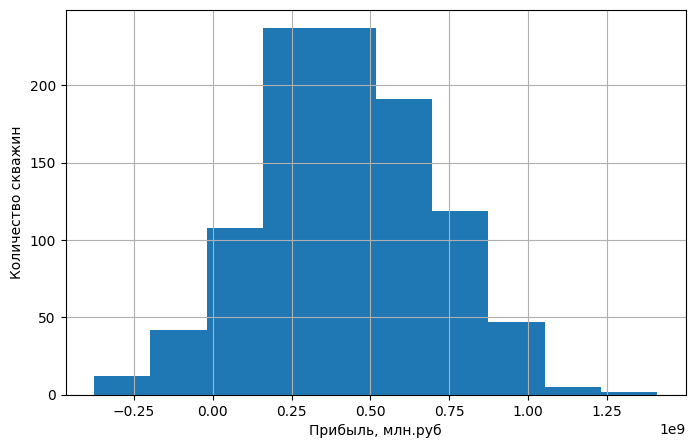

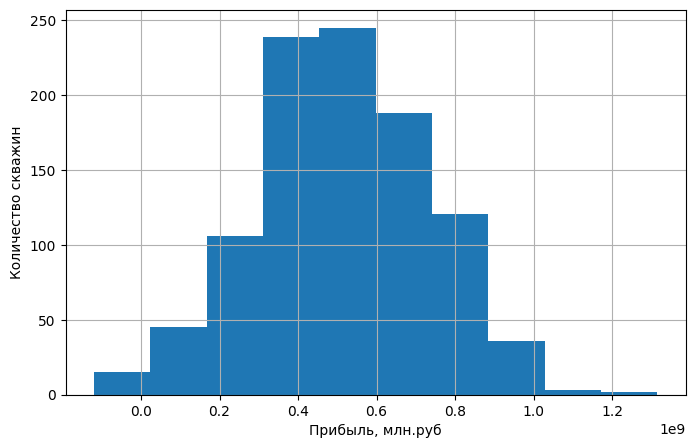

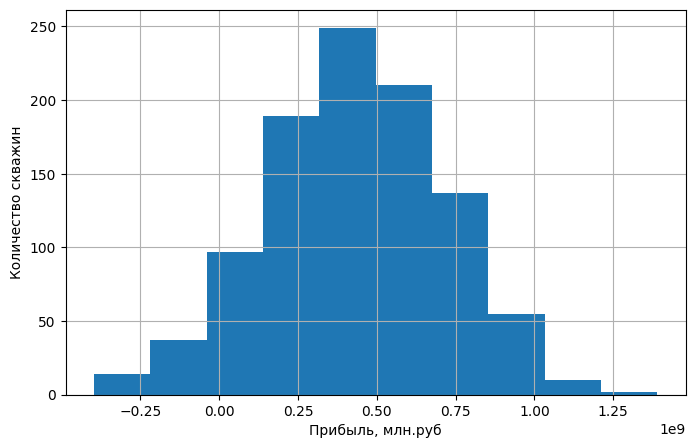

In [39]:
# Попробуем рассмотреть в графическом виде
for i in range(0, 3):
    pd.Series(values_region[i]).plot(kind="hist", grid=True, figsize=(8,5))
    plt.xlabel('Прибыль, млн.руб')
    plt.ylabel('Количество скважин')
    plt.show()

Выше можно посмотреть, выше графики, то сразу невооружеными глазами можно заметить, что второй регион занимает превосходство по минимальному уровню отклонения. А первый и второй регион приблизительное одинаковое значение по отклонению. Следовательно, лучше всего брать второй регион.

А по поводу график, в первом и втором графике можно увидеть сходство, но график прибыли у второго региона сдвинут направо, т.е. самым делая средним доходом в положительную сторону, а у третьго - более напоминает всего "нормальное распределение" и присутствует отрицательный квантиль.